<a href="https://colab.research.google.com/github/anhhahuynh/AI-Midterm/blob/main/hand_palm_outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/chitay/'

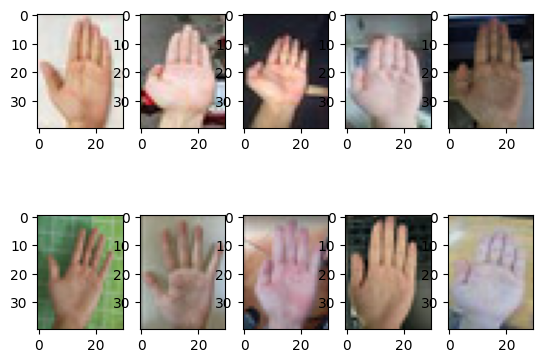

In [ ]:
for i in range(10):
  plt.subplot(2,5,i+1)
  filename = folder + 'loai6 ('+str(i)+').jpg'
  img = plt.imread(filename)
  plt.imshow(img)

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/chitay/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('loai1 '):
    output = 1
  if file.startswith('loai2 '):
    output = 2
  if file.startswith('loai3 '):
    output = 3
  if file.startswith('loai4 '):
    output = 4
  if file.startswith('loai5 '):
    output = 5
  if file.startswith('loai6 '):
    output = 6
  if file.startswith('loai7 '):
    output = 7
  if file.startswith('loai8 '):
    output = 8
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('tay_photos.npy',photos)
save('tay_labels.npy',labels)

(80, 30, 40, 3) (80,)


In [ ]:
import numpy as np
x_train = np.load('/content/tay_photos.npy')
y_train = np.load('/content/tay_labels.npy')
print(x_train.shape)
print(y_train.shape)

(80, 30, 40, 3)
(80,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=8,epochs = 40,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 10, 64)         0

1/1 [==============================] - 0s 48ms/step


'Sinh mệnh dài, công danh tốt, tình duyên lận đận '

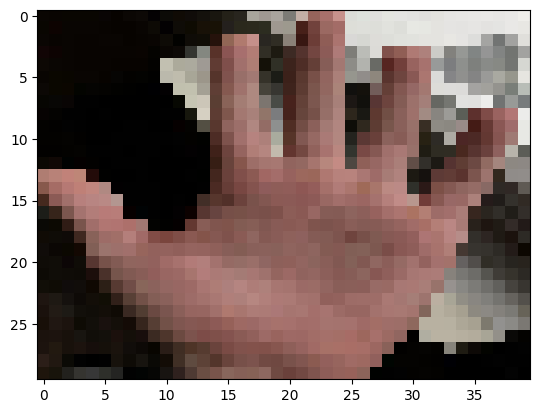

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Sinh mệnh ngắn, công danh tốt, tình duyên lận đận',2:'Sinh mệnh ngắn, công danh tốt, tình duyên thăng hoa',
       3:'Sinh mệnh ngắn, công danh kém, tình duyên lận đận', 4:'Sinh mệnh ngắn, công danh kém, tình duyên thăng hoa', 
       5:'Sinh mệnh dài, công danh tốt, tình duyên lận đận ',6:'Sinh mệnh dài, công danh tốt, tình duyên thăng hoa',
       7:'Sinh mệnh dài, công danh kém, tình duyên lận đận',  8:'Sinh mệnh dài, công danh kém, tình duyên thăng hoa'}
img = load_img("/content/drive/MyDrive/taytest.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 30ms/step


'Sinh mệnh ngắn, công danh kém, tình duyên lận đận'

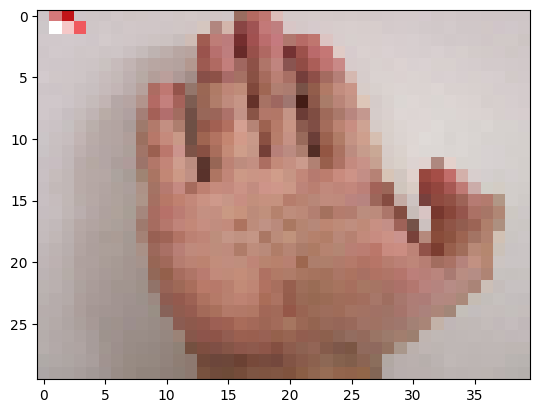

In [ ]:

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Sinh mệnh ngắn, công danh tốt, tình duyên lận đận',2:'Sinh mệnh ngắn, công danh tốt, tình duyên thăng hoa', 3:'Sinh mệnh ngắn, công danh kém, tình duyên lận đận', 4:'Sinh mệnh ngắn, công danh kém, tình duyên thăng hoa', 5:'Sinh mệnh dài, công danh tốt, tình duyên lận đận ',6:'Sinh mệnh dài, công danh tốt, tình duyên thăng hoa',7:'Sinh mệnh dài, công danh kém, tình duyên lận đận',  8:'Sinh mệnh dài, công danh kém, tình duyên thăng hoa'}
img = load_img("/content/drive/MyDrive/taytest2.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]